### Bias variance tradeoff

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

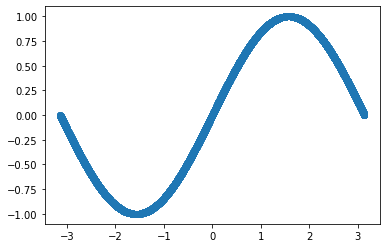

In [100]:
n_points = 10000
x = np.random.uniform(-math.pi,math.pi,n_points)
true_y = np.sin(x)
plt.scatter(x,true_y)

In [101]:
sample = np.random.choice([i for i in range(n_points) ],2,replace = False)

In [40]:
X_sample = x[sample]
y_sample = true_y[sample]

In [44]:
X_sample.reshape(len(X_sample),1)

array([[ 2.34232743],
       [-1.68600706]])

In [46]:
model = LinearRegression()
model.fit(X_sample.reshape(len(X_sample),1),y_sample)

LinearRegression()

In [49]:
linear_rect = model.coef_[0]*x + model.intercept_

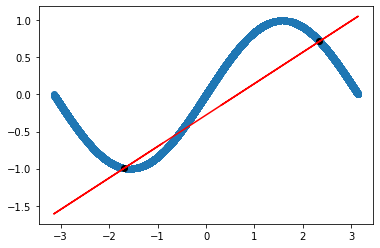

In [52]:
plt.scatter(x,true_y)
plt.plot(x,linear_rect,color = "red",)
plt.scatter(X_sample,y_sample,color = "black")


In [105]:
iterations = 10000
model = LinearRegression()
linear_rects = []
for i in range(iterations):
    sample = np.random.choice([i for i in range(n_points) ],2,replace = False)
    X_sample = x[sample]
    y_sample = true_y[sample]
    model.fit(X_sample.reshape(len(X_sample),1),y_sample)
    linear_rects.append(model.coef_[0]*x + model.intercept_)
linear_rects = np.asarray(linear_rects)


In [103]:
avg_model = np.mean(linear_rects,axis = 0)

In [89]:
avg_model.shape

(10000,)

In [106]:
np.mean(np.mean((linear_rects - avg_model)**2,axis = 0),axis = 0)

1.6627160509846992

In [109]:
np.mean((avg_model - true_y)**2)

0.2138075995011875

In [119]:
iterations = 10000
model = LinearRegression()
constant_rects = []
for i in range(iterations):
    sample = np.random.choice([i for i in range(n_points) ],2,replace = False)
    X_sample = x[sample]
    y_sample = true_y[sample]
    constant_rects.append(np.repeat((y_sample[0] + y_sample[1])/2,repeats =n_points))
constant_rects = np.asarray(constant_rects)


In [120]:
avg_model_constant = np.mean(constant_rects,axis = 0)

In [121]:
avg_model_constant.shape

(10000,)

In [122]:
np.mean(np.mean((constant_rects - avg_model_constant)**2,axis = 0),axis = 0)

0.24401284649803323

In [123]:
np.mean((avg_model_constant - true_y)**2)

0.49394812451935477